## Plot a categorial-plot to get an overview of the runs made with DAVID Tool

**Goal: get a categorical-plot of the sub-clusters that prevalence under different setup runs with David Tool.** <br><br>
**Input:** metadata_cluster_comparision_by_categories_py.csv<br>
This file was cured at hand based on the DAVID clustering rpt (ref. file: suplementario\data_DAVIDClustering_summary.xls)
<br>
**Output:** a categorical plot that represents as many runs you have feed in the metadata file <br><br>
Made by: Cynthia Soto<br>
Date: xxxxxx 2022<br>
Last md: March 23rd, 2022<br>

**Assumptions:**<br>
You need to feed the metadata input file

**Important NOTE:**<br>
To correctly parse the DAVID rpt file generated with DAVID Tool v. 6.8 (from January 2022), you need to add a  first line header; g.e: (note it is the same used to label the clusters, just copy and paste)
**Category	Term	Count	%	PValue	Genes	List Total	Pop Hits	Pop Total	Fold Enrichment	Bonferroni	Benjamini	FDR**

In [103]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 

In [104]:
# Set the base directory
try:
    # Change the current working Directory      
    os.chdir("/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/MG_DarkMagenta_WGCNA_DAVID_VisANT")
    print("Directory changed:", os.getcwd() )
except OSError:
    print("Can't change the Current Working Directory")        
#print(os.listdir(os.getcwd())  

Directory changed: /home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/MG_DarkMagenta_WGCNA_DAVID_VisANT


In [105]:
# clusters_file = os.path.basename(file)
# clusters_file = 'metadata_cluster_comparision_by_categories_py.csv'
# have alternative labels for leyend in the plot
clusters_file = 'metadata_cluster_comparision_by_categories_py_v2.csv'
clusters_file

'metadata_cluster_comparision_by_categories_py_v2.csv'

In [106]:
# Remember to add a header line by hand in the input file to capture the column names  
df_clusters = pd.read_csv(clusters_file, header=0, index_col=0, sep=',')  #(clusters_file, header=1, index_col=0, sep='\t')
df_clusters.reset_index(inplace=True)

In [108]:
df_clusters.head(15)

,RUN_ID,ORIGINAL_CLUSTER_NAME,Cluster_Type,Cluster_Desc,Cluster_Number,Number_Of_Genes,Unique_Genes,Enrichment_Score
0,RUN0,Clust_12,1,C1. Cell wall / extracellular region,C1. Cell wall / ER,28,14,0.42835
1,RUN1,Clust_8,1,C1. Cell wall / extracellular region,C1. Cell wall / ER,28,14,0.42835
2,RUN3,Clust_6,1,C1. Cell wall / extracellular region,C1. Cell wall / ER,22,12,0.09393
3,RUN3,Clust_2,2,C2. Cell wall biogenesis,C2. Cell wall B,17,6,1.11324
4,RUN3,Clust_3,3,C3. Developmental protein,C3. Dev. protein,17,8,0.62078
5,RUN0,Clust_9,3,C3. Developmental protein,C3. Dev. protein,23,8,0.59716
6,RUN1,Clust_6,3,C3. Developmental protein,C3. Dev. protein,23,8,0.59716
7,RUN3,Clust_1,4,C4. Glycosyltransferase,C4. Glycosyltrans,29,12,1.42021
8,RUN0,Clust_3,4,C4. Glycosyltransferase,C4. Glycosyltrans,34,12,1.34897
9,RUN1,Clust_2,4,C4. Glycosyltransferase,C4. Glycosyltrans,34,12,1.34897


In [109]:
#sns.catplot(x="RUN_ID", y="Unique_Genes", hue="Cluster_Desc", jitter=False, data=df_clusters)

In [110]:
sns.catplot

<function seaborn.categorical.catplot(*, x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x7f82f013b9d0>, ci=95, n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)>

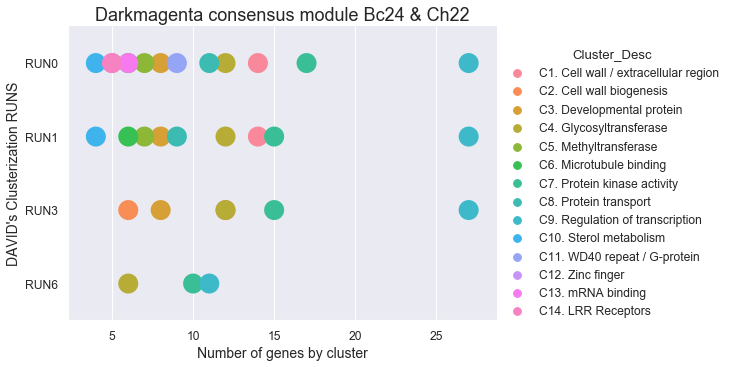

In [111]:
# plot figure
#sns.set_theme()
#plt.figure(figsize=(25, 4))

# #sns.set_theme(style="ticks")  #whitegrid
# #sns.set_context('notebook')   #paper, notebook, talk, poster
sns.set_theme(style='whitegrid', palette='pastel')   
sns.set(font_scale = 1.1)

# jitter: The jitter parameter controls the magnitude of jitter or disables it altogether
# s: marker size 
# aspect:  aspect * height gives the width
# change x="RUN_ID", y="Unique_Genes" to plot in vertical way
ax = sns.catplot(x="Unique_Genes", y="RUN_ID", hue="Cluster_Desc", jitter=False, 
                data=df_clusters,s=20, 
                height=5, aspect=1.5)   
ax.set_xlabels('Number of genes by cluster', fontsize=14) # not set_label
ax.set_ylabels("DAVID's Clusterization RUNS", fontsize= 14)
plt.title('Darkmagenta consensus module Bc24 & Ch22',  fontsize= 18)
plt.show()


In [99]:
# sns.plotting_context()
# sns.plotting_context("notebook")

In [114]:
# preparing labels to print and selected clusters
list_of_column_number = list(df_clusters['Cluster_Number'])
plot_labels = list( dict.fromkeys(list_of_column_number) )
plot_labels = plot_labels[:-4]
plot_labels

['C1. Cell wall / ER',
 'C2. Cell wall B',
 'C3. Dev. protein',
 'C4. Glycosyltrans',
 'C5. Methyltransf',
 'C6. Microtubule B',
 'C7. PK activity',
 'C8. Protein transp',
 'C9. Regulation transc',
 'C10. Sterol met']

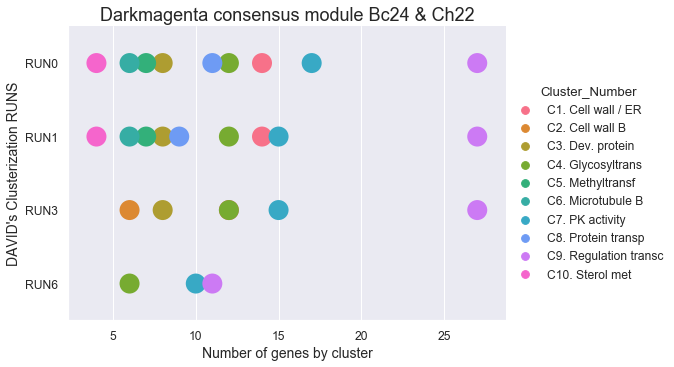

In [115]:
#sns.set_theme(style='whitegrid', palette='husl')   
sns.set(font_scale = 1.1)

# jitter: The jitter parameter controls the magnitude of jitter or disables it altogether
# s: marker size 
# aspect:  aspect * height gives the width
# change x="RUN_ID", y="Unique_Genes" to plot in vertical way

ax = sns.catplot(x="Unique_Genes", y="RUN_ID", hue='Cluster_Number',
                jitter=False, 
                data=df_clusters,
                s=20, 
                height=5, aspect=1.5,
                hue_order = plot_labels, 
                palette='husl')

ax.set_xlabels('Number of genes by cluster', fontsize=14) # not set_label
ax.set_ylabels("DAVID's Clusterization RUNS", fontsize= 14)
plt.title('Darkmagenta consensus module (Bc24 & Ch22)',  fontsize= 18)
plt.show()
